# Swarm Data Exploration FAO Locust Hub - 2020 Locust Invasion

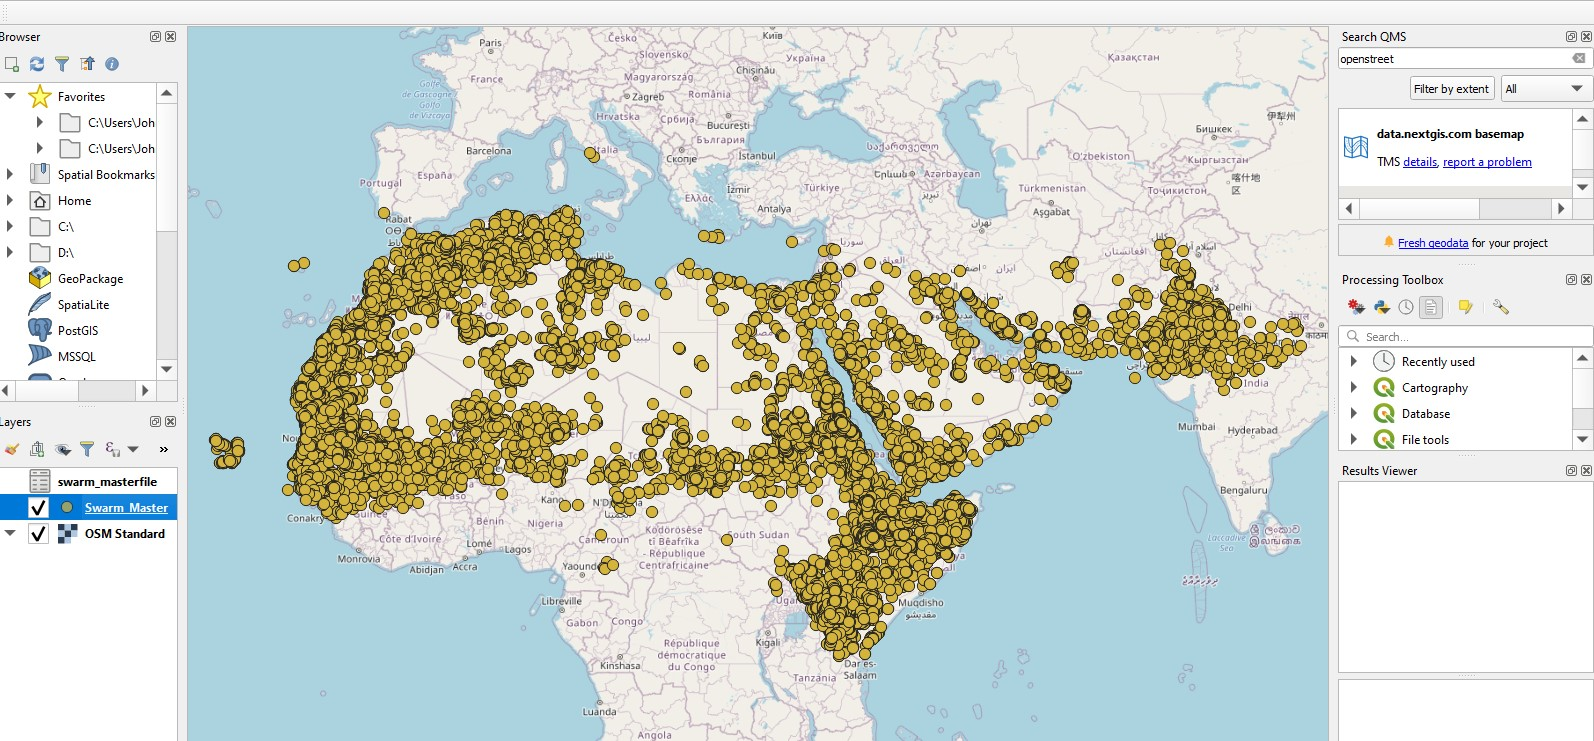

### Swarm invasion from 1985 as visualized in QGIS 

This notebook will be used to explore swarm invasion data downloaded from the FAO Desert Locust Hub Portal.

You can find the data here: https://locust-hub-hqfao.hub.arcgis.com/datasets/swarms-1/data?geometry=30.884%2C0.881%2C41.365%2C2.802&showData=true

In [103]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio

In [104]:
df = pd.read_csv('C:/Users/JohnWaweru/Desktop/DATA_ANALYSIS/SWARM_MASTER_DATASET/swarm_masterfile.csv')
df.shape

C:\Users\JohnWaweru\anaconda3\envs\thesis\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10,138,140,142) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(37541, 152)

In [52]:
df.head(5)

,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,AREAHA,LOCRELIAB,...,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT,X,Y
0,1,1985/11/30,12:00,1985/11/30,12:00,No,Late,NaN,0.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,-15.131944,17.870278
1,2,1985/11/26,12:00,1985/11/26,12:00,No,Late,NaN,0.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,-15.400278,18.030833
2,3,1985/11/27,12:00,1985/11/27,12:00,No,Late,NaN,0.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,-14.668889,17.988889
3,4,1985/11/30,12:00,1985/11/30,12:00,No,Late,NaN,0.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,-14.633333,17.835833
4,5,1985/10/15,12:00,1985/10/15,12:00,Yes,NaN,NaN,0.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,-13.353889,18.026389


#### Check the number of swarm invasions recorded to date

In [53]:
len(df)

37541

In [54]:
df.tail(2)

,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,AREAHA,LOCRELIAB,...,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT,X,Y
37539,60995,2021/07/15,17:20,2021/07/15,17:20,No,Middle,Sarar,300.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,45.313611,13.637778
37540,60996,2021/07/01,00:00,2021/07/01,00:00,No,Early,Ali Sabieh,5.0,Exact,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Swarm,42.647778,11.215278


## 1. Cleaning

### Date & time

#### Merge date & time columns and convert them into datetime format

In [55]:
# Only keep the date of the start date column
df['STARTDATE'] = pd.to_datetime(df['STARTDATE']).dt.date.astype('str')
# Merge date and time columns into a datetime column
df['datetime_start'] = pd.to_datetime(df['STARTDATE'] + ' ' + df['TmSTARTDAT'])
# Same for finish date & time columns
df['FINISHDATE'] = pd.to_datetime(df['FINISHDATE']).dt.date.astype('str')
df['datetime_finish'] = pd.to_datetime(df['FINISHDATE'] + ' ' + df['TmFINISHDA'])
# Drop superfluous date and time columns
df = df.drop(['STARTDATE', 'TmSTARTDAT', 'FINISHDATE', 'TmFINISHDA'], axis=1)

#### Only keep the observations from 2020 - the data goes back to 1985!

In [56]:
df = df[df['datetime_start'].dt.year == 2020]

#### Let us check if there is an entry where datetime_start and datetime_finish differ

In [57]:
df[df['datetime_start'] != df['datetime_finish']]

,OBJECTID,EXACTDATE,PARTMONTH,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,...,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT,X,Y,datetime_start,datetime_finish


#### Now let's remove & rename the columns accordingly for visualization

In [58]:
df = df.drop(['datetime_finish'], axis=1)
df = df.rename(columns={'datetime_start' : 'datetime'})

In [46]:
df = df.sort_values('datetime')

### Location

#### Now will only consider swarm invasions recorded in Kenya

In [61]:
df = df[df['COUNTRYID'] == 'KE']

#### Now use the XY coordinates in the dataframe to convert it into a geodataframe 

In [62]:
# convert to geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y))

# change projection to fit with background map
gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

C:\Users\JohnWaweru\anaconda3\envs\thesis\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## 2. Data exploration
The legend for the data comes in a seperately downloadable excel sheet. Based on that, I have tried to select the potentially relevant columns and explored them below.

### Location name
Text field for the location of the sighting

In [63]:
len(gdf.LOCNAME.unique())

1167

In [64]:
gdf.LOCNAME.value_counts()

Samburu                 147
Marsabit county kala    135
Turkana County,Lowoi     74
Marsabit                 47
marsabit county Nort     45
                       ... 
Othaya                    1
Kithyoko                  1
Lemorijo                  1
Civicon-oltorot area      1
Lomeyan(lomil)            1
Name: LOCNAME, Length: 1166, dtype: int64

There are over 1000 location names in the column and the entries look quite dirty, so this column might be of limited use.

### Location & report reliability
Columns indicating whether the location was recorded accurately and the report is reliable (unclear what this assessment is based on)

In [ ]:
gdf.LOCRELIAB.value_counts()

Exact    2317
Name: LOCRELIAB, dtype: int64

In [67]:
gdf.REPRELIAB.value_counts()

1.0    2316
2.0       1
Name: REPRELIAB, dtype: int64

All of 2168 invasion records registered locations in Kenya 2020 are considered reliable. 
The legend says: 
dubious (0) 
reliable (1)

### Locust presence
Whether locusts were present / observed or not

In [69]:
gdf.LOCPRESENT.value_counts()

1.0    2315
2.0       2
Name: LOCPRESENT, dtype: int64

There are only 2 entries were no locusts were reported.

### Comments
Text field for comments on the observation

In [70]:
gdf.ACOMMENT.value_counts()

(eL3M)                  563
eL3M                    144
they are grassing (e     39
(EarthRanger)            27
(eL3)                    25
                       ... 
transience gregariou      1
spray required at So      1
samburu North Sub co      1
The Swarm is settlin      1
Copulating and layin      1
Name: ACOMMENT, Length: 418, dtype: int64

### Gregarious hopper density / count / maturity / colour / area
Specific attributes of the nature of sighted locust swarms. Below only a selection of columns as most of them have no data.

In [71]:
# Low gregarious adult density (0-no, 1-yes)
gdf.GADDENLOW.value_counts()

0.0    2317
Name: GADDENLOW, dtype: int64

In [72]:
# Medium gregarious adult density (0-no, 1-yes)
gdf.GADDENMED.value_counts()

0.0    2304
1.0      13
Name: GADDENMED, dtype: int64

In [73]:
# High gregarious adult density (0-no, 1-yes)
gdf.GADDENHI.value_counts()

0.0    2275
1.0      42
Name: GADDENHI, dtype: int64

In [74]:
# gregarious adult minimum area (km2)
gdf.GADMINASKM.value_counts()

0.00     2297
2.00        3
10.00       3
14.00       1
30.00       1
80.00       1
1.00        1
25.00       1
24.00       1
0.10        1
0.65        1
1.68        1
2.34        1
0.15        1
15.00       1
8.00        1
3.00        1
Name: GADMINASKM, dtype: int64

In [75]:
# gregarious adult maximum area (km2)
gdf.GADMAXASKM.value_counts()

0.00      2297
2.00         4
10.00        3
30.00        2
24.00        1
8.00         1
14.00        1
100.00       1
5.00         1
0.10         1
0.65         1
1.68         1
2.34         1
0.15         1
15.00        1
Name: GADMAXASKM, dtype: int64

Very few limited information in these columns. One could use it to identify examples of some large / dense locust swarms, but most likely incomplete.

### Location

Now let's map the datapoints to get a better feeling of the data

In [76]:
# drop observations that were unreliable or where no locusts were sighted
gdf = gdf[(gdf.LOCPRESENT == 1) & (gdf.REPRELIAB == 1)]

NameError: name 'ctx' is not defined

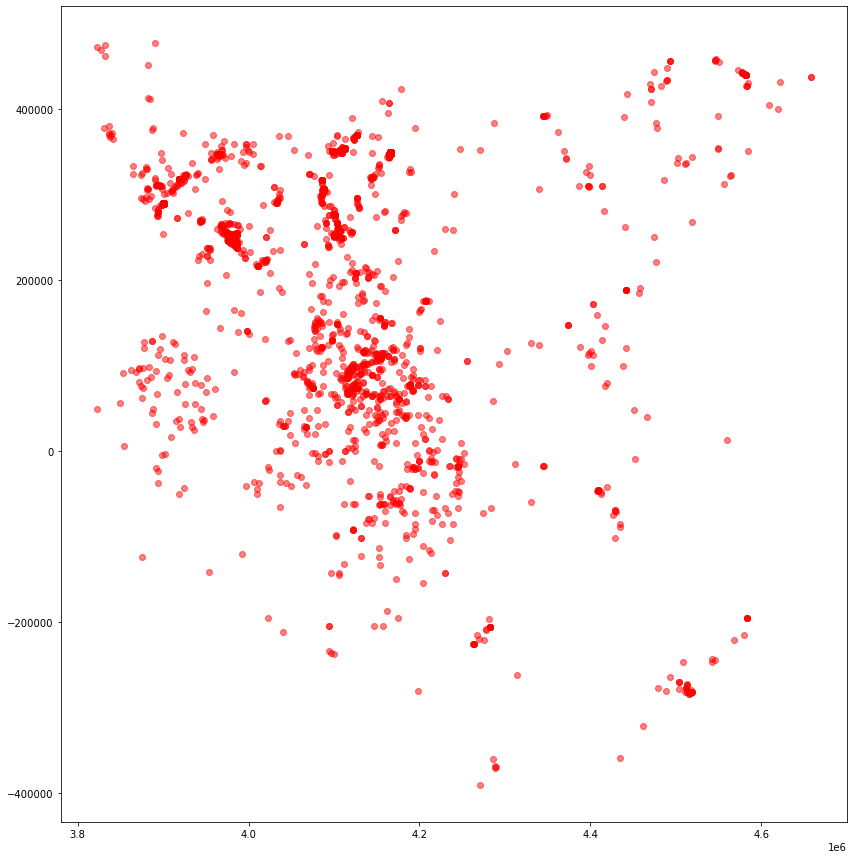

In [81]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, alpha=0.5, linewidth=1, color='red', zorder=2)
ctx.add_Basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.show()

### Check swarm invasion period by month

In [84]:
# set index to month (number)
gdf = gdf.set_index(gdf.datetime.dt.month)

<AxesSubplot:xlabel='datetime'>

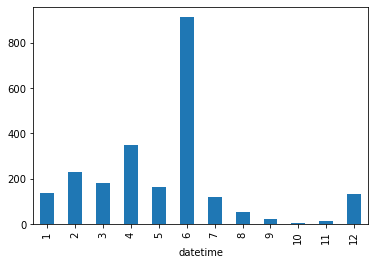

In [85]:
gdf.groupby(gdf.index)['X'].count().plot(kind='bar')

By far the most observations are from June, with relatively few entries from August onwards.



## 3. Animated swarm invasion map (GIF)
Now we create an animated map to view the invasions at spatio-temporal scale 

In [86]:
# set index to month name
gdf = gdf.set_index(gdf.datetime.dt.month_name())

In [94]:
def create_maps(path_images):
 
    for i in gdf.index.unique():
        fig, ax = plt.subplots(figsize=(15, 15))

        ax.set_aspect(aspect='equal')
        ax.set_axis_off()
        ax.set_ylim([-300_000, 500_000])
        ax.set_xlim([3_800_000, 4_700_000])

        gdf.loc[i].plot(ax=ax, alpha=0.5, linewidth=1, color='red', zorder=2)
        ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

        fig.text(0.2, 0.5, i, fontsize=100, color='gray', alpha=0.2, weight='bold')
        
        plt.savefig(f'{path_images}/{i}.png')

        print(i)

NameError: name 'ctx' is not defined

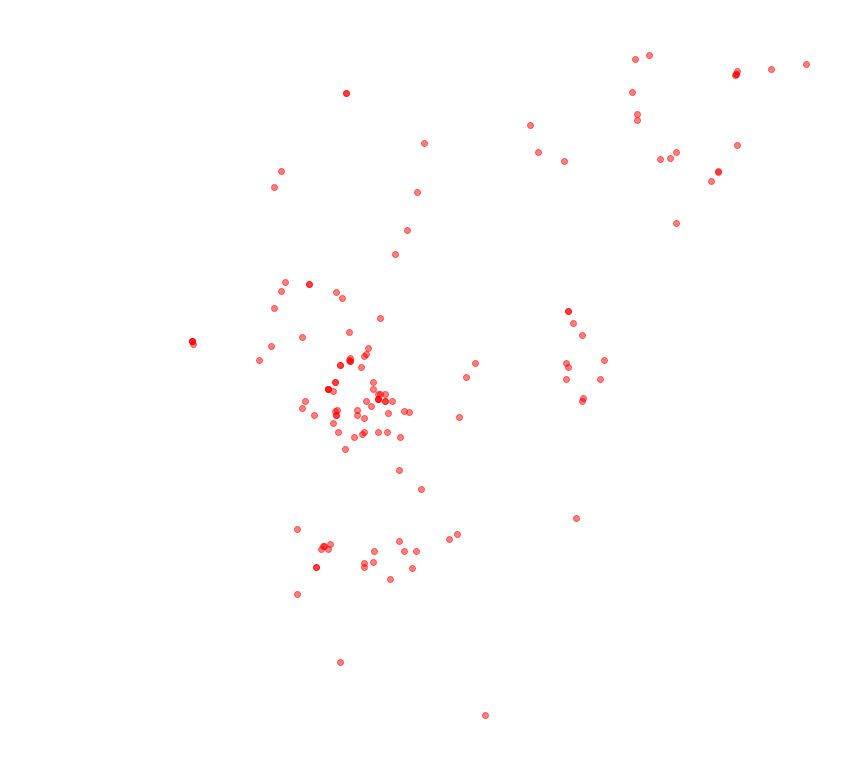

In [95]:
create_maps('gif/pictures')

In [98]:
def create_gif(path_images, path_gif):
    list_of_images = []

    for i in gdf.index.unique():
        img = imageio.imread(f'{path_images}/{i}.png')
        list_of_images.append(img)

    imageio.mimsave('C:/Users/JohnWaweru/Desktop/DATA_ANALYSIS/Gifs', list_of_images, fps=2)

In [102]:
create_gif('C:/Users/JohnWaweru/Desktop/DATA_ANALYSIS/Gifs', 'gif/locust.gif')

FileNotFoundError: No such file: 'C:\Users\JohnWaweru\Desktop\DATA_ANALYSIS\Gifs\January.png'

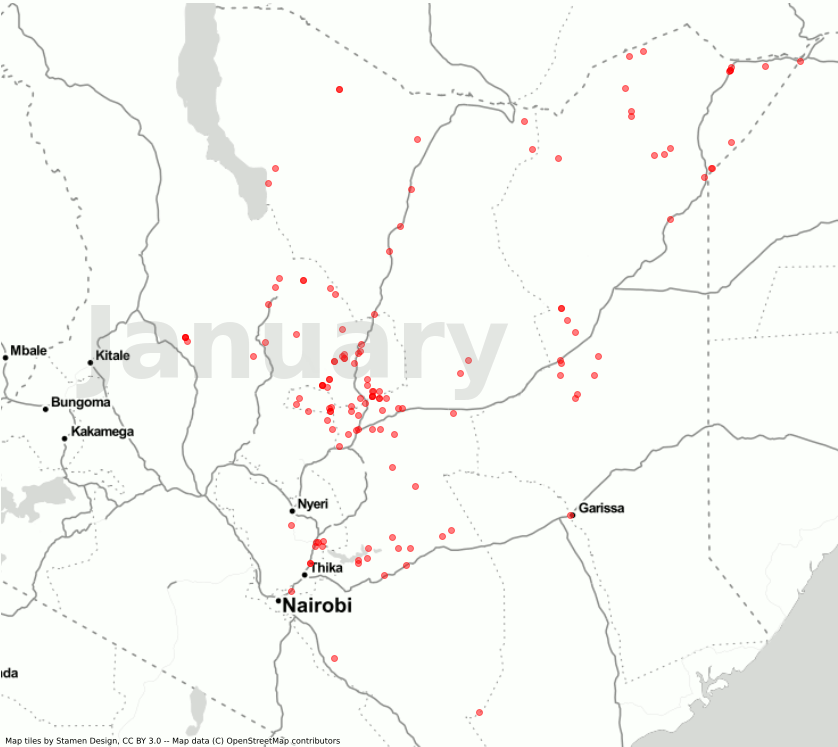